***Color manual***

<div class="alert alert-block alert-success">
<b>Green - Libraries</b>
</div>

<div class="alert alert-block alert-info">
<b>Blue - Information</b>
</div>

<div class="alert alert-block alert-danger">
<b>Red - Problems</b>
</div>

***

<div class="alert alert-block alert-success">
<b>Import libraries</b>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob

%matplotlib inline
sns.set(style = 'white')

<div class="alert alert-block alert-info">
<b>Match the file name pattern with glob</b>
</div>

In [2]:
Happiness = sorted(glob('World Happiness Report - *.csv'))

Happiness

['World Happiness Report - 2018.csv', 'World Happiness Report - 2019.csv']

<div class="alert alert-block alert-info">
<b>Load the data concatenated</b>
</div>

In [3]:
# Concatenate both dataframes 
df = pd.concat((pd.read_csv(file).assign(filename = file) for file in Happiness), ignore_index = False)

# Replace the name to just a number to be possible to convert the variable
df['filename'].replace({'World Happiness Report - 2018.csv': '2018', 
                        'World Happiness Report - 2019.csv': '2019'}, inplace = True)

# Convert object to integer
df['date'] = df['filename'].astype(str).astype(int)

# Convert itneger to datetime
df['date'] = pd.to_datetime(df['date'], format = '%Y')

#If needed it's possible to extract just a period and use as index right away
df['Year'] = df['date'].dt.year

# Set index
df.set_index('date', inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2018-01-01 to 2019-01-01
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   filename                      312 non-null    object 
 10  Year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 29.2+ KB


<div class="alert alert-block alert-info">
<b>Correlation matrix</b>
</div>

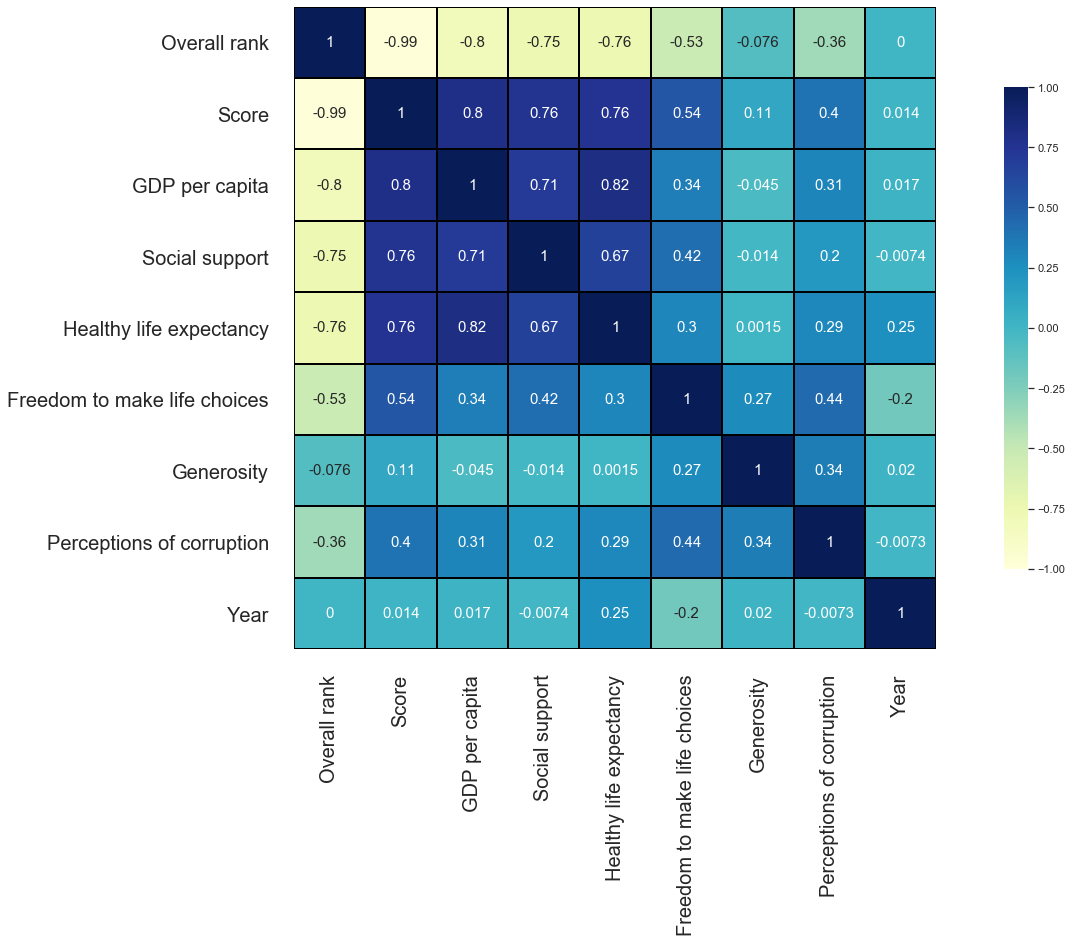

In [4]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 15, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 15)

ax = sns.heatmap(df.corr(), annot = True, cmap = "YlGnBu", vmax= 1, center = 0, vmin= -1,
            square = True, linewidths = 1, linecolor = 'black', cbar_kws = {'shrink': 0.75})

ax.tick_params(labelsize = 20, length = 10)

plt.show()

<div class="alert alert-block alert-info">
<b>Barplot of score by contry or region </b>
</div>

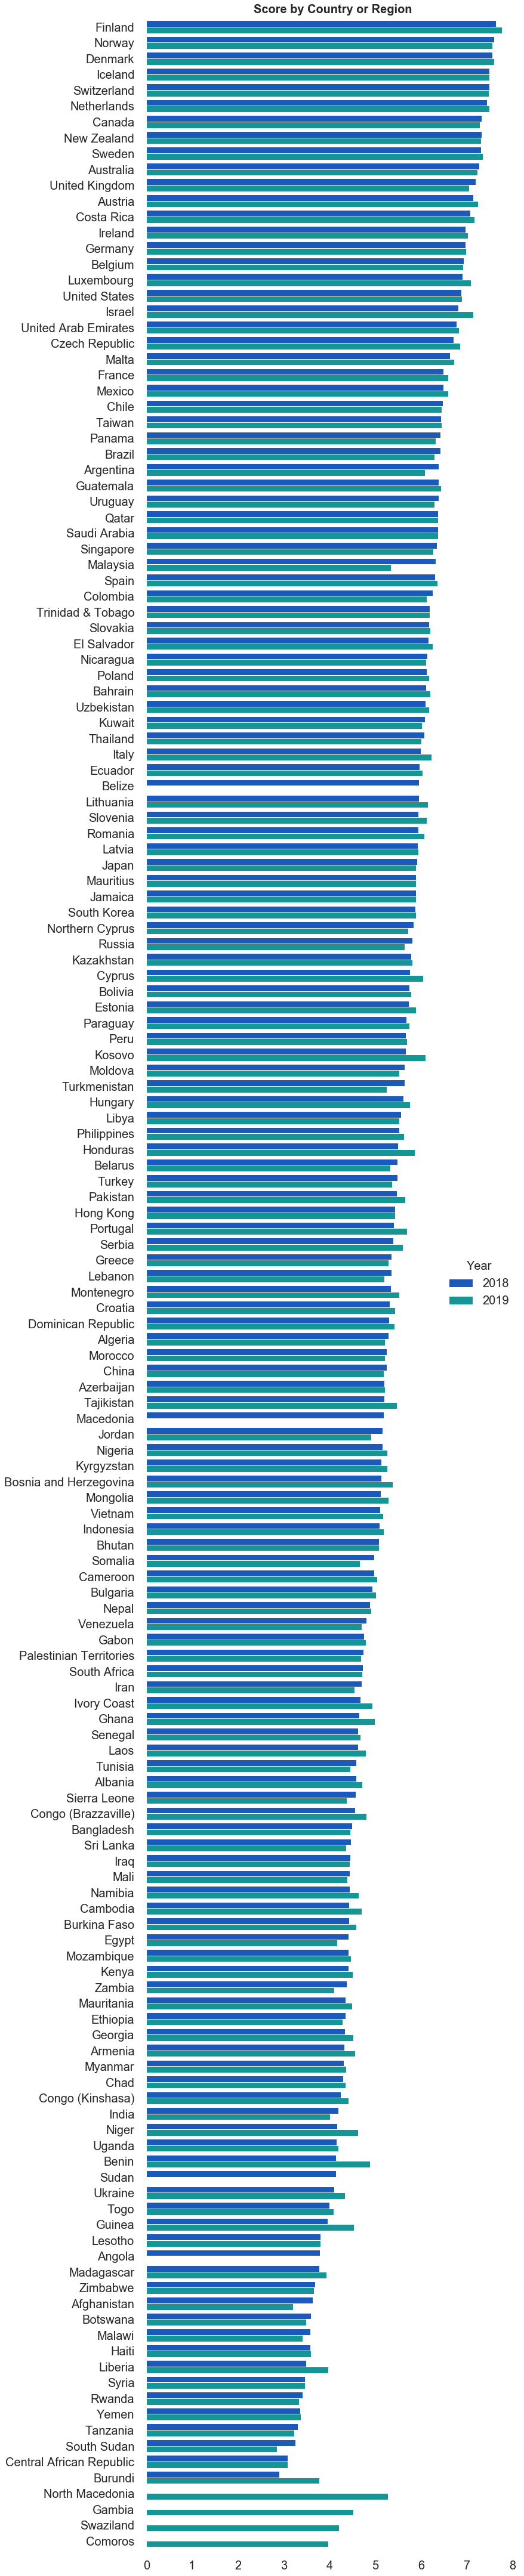

In [5]:
plt.figure(figsize = (10, 60))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(axis = 'both', pad = 10, size = 10)  
plt.tight_layout()                                               
plt.rc('font', size = 20)

ax = sns.barplot(x = df['Score'], y = df['Country or region'], hue = df.Year, 
                 orient = 'h', palette = 'winter')

ax.set_title('Score by Country or Region', weight = 'bold', fontsize = 20, pad = 10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelsize = 20, length = 10)
ax.legend(loc = 'best', title = 'Year', prop = {'size':20}, frameon = False)

sns.despine(left = True, bottom = True)
plt.show()

<div class="alert alert-block alert-info">
<b>Pivot tables sorted by generosity</b>
</div>

In [14]:
pivot_all = pd.pivot_table(df, index =  ['Year', 'Country or region', 'Overall rank'], 
                               values = ['Score', 'GDP per capita','Healthy life expectancy', 
                                         'Social support', 'Freedom to make life choices', 'Generosity',
                                         'Perceptions of corruption'])

column_order = ['Score', 'GDP per capita','Healthy life expectancy', 
                'Social support', 'Freedom to make life choices', 'Generosity',
                'Perceptions of corruption']

WHR = pivot_all.reindex(column_order, axis=1)

WHR_sorted = WHR.sort_values(by = ['Generosity'])

# To create a excel file 
# WHR_sorted.to_excel(r'C:\Users\'USER NAME'\Desktop\World Happiness Report.xlsx', index = True, header = True)

WHR_sorted

Score  GDP per capita  \
Year Country or region Overall rank                          
2018 Greece            79            5.358           1.154   
2019 Greece            82            5.287           1.181   
     Botswana          148           3.488           1.041   
2018 Lithuania         50            5.952           1.197   
     Morocco           85            5.254           0.779   
...                                    ...             ...   
2019 Haiti             147           3.597           0.323   
2018 Indonesia         96            5.093           0.899   
2019 Indonesia         92            5.192           0.931   
     Myanmar           131           4.360           0.710   
2018 Myanmar           130           4.308           0.682   

                                     Healthy life expectancy  Social support  \
Year Country or region Overall rank                                            
2018 Greece            79                              0.879           1.202   
2019 Greece            82                              0.999           1.156   
     Botswana          148                             0.538           1.145   
2018 Lithuania         50                              0.716           1.527   
     Morocco           85                              0.669           0.797   
...                                                      ...             ...   
2019 Haiti             147                             0.449           0.688   
2018 Indonesia         96                              0.522           1.215   
2019 Indonesia         92                              0.660           1.203   
     Myanmar           131                             0.555           1.181   
2018 Myanmar           130                             0.429           1.174   

                                     Freedom to make life choices  Generosity  \
Year Country or region Overall rank                                             
2018 Greece            79                                   0.131       0.000   
2019 Greece            82                                   0.067       0.000   
     Botswana          148                                  0.455       0.025   
2018 Lithuania         50                                   0.350       0.026   
     Morocco           85                                   0.460       0.026   
...                                                           ...         ...   
2019 Haiti             147                                  0.026       0.419   
2018 Indonesia         96                                   0.538       0.484   
2019 Indonesia         92                                   0.491       0.498   
     Myanmar           131                                  0.525       0.566   
2018 Myanmar           130                                  0.580       0.598   

                                     Perceptions of corruption  
Year Country or region Overall rank                             
2018 Greece            79                                0.044  
2019 Greece            82                                0.034  
     Botswana          148                               0.100  
2018 Lithuania         50                                0.006  
     Morocco           85                                0.074  
...                                                        ...  
2019 Haiti             147                               0.110  
2018 Indonesia         96                                0.018  
2019 Indonesia         92                                0.028  
     Myanmar           131                               0.172  
2018 Myanmar           130                               0.178  

[312 rows x 7 columns]